# IMPORTS

In [462]:
import pandas as pd
from typing import Dict, List
from collections import Counter
from pprint import pprint
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

# Data Reading

In [463]:
path1="/home/redha/Documents/projects/NLP/datamining project/Soil-Fertility/data/Dataset1.csv"
path2="/home/redha/Documents/projects/NLP/datamining project/Soil-Fertility/data/Dataset2.csv"
path3="/home/redha/Documents/projects/NLP/datamining project/Soil-Fertility/data/Dataset3.xlsx"

In [464]:
df=pd.read_csv(path2)

# Data manipulation

## Data cleaning

In [465]:
df.head()

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,10/11/2020,10/31/2020,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,5/30/2021,6/19/2021,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,3/28/2021,4/17/2021,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2/6/2022,2/26/2022,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,6/20/2021,7/10/2021,14.0,3033.0,17.0,1.7,363.4,0.6


In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zcta             337 non-null    int64  
 1   time_period      337 non-null    int64  
 2   population       337 non-null    int64  
 3   Start date       337 non-null    object 
 4   end date         337 non-null    object 
 5   case count       311 non-null    float64
 6   test count       325 non-null    float64
 7   positive tests   310 non-null    float64
 8   case rate        337 non-null    float64
 9   test rate        337 non-null    float64
 10  positivity rate  337 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 29.1+ KB


we have 2 columns with type object, we will convert them to datetime

let's analyze them

In [467]:
df['Start date'].unique()

array(['10/11/2020', '5/30/2021', '3/28/2021', '2/6/2022', '6/20/2021',
       '1/16/2022', '5/17/2020', '8/30/2020', '9/20/2020', '9/25/2022',
       '9/12/2021', '11/22/2020', '11/1/2020', '2/14/2021', '6/12/2022',
       '7/3/2022', '10/24/2021', '9/4/2022', '10/3/2021', '6/28/2020',
       '1/24/2021', '4/26/2020', '12/13/2020', '4/5/2020', '1/3/2021',
       '3/15/2020', '2/23/2020', '1/12/2020', '5/9/2021', '5/22/2022',
       '3/7/2021', '8/9/2020', '4/18/2021', '4/10/2022', '7/11/2021',
       '10/16/2022', '12/5/2021', '7/19/2020', '8/22/2021', '8/1/2021',
       '12/26/2021', '2/27/2022', '3/20/2022', '6/7/2020', '5/1/2022',
       '8/14/2022', '11/14/2021', '7/24/2022', '12/22/2019', '5-Apr',
       '22-Nov', '11-Oct', '1-Nov', '9-Aug', '26-Apr', '24-Jul', '14-Nov',
       '28-Mar', '12-Jun', '19-Jul', '7-Mar', '4-Sep', '10-Apr', '30-Aug',
       '28-Jun', '17-May', '16-Oct', '15-Mar', '23-Feb', '2-Feb',
       '20-Jun', '20-Sep', '25-Sep', '14-Feb', '1-May', '3-Jul', '7-Jun

we have multiple formats for the date, we will convert them to a single format

In [468]:
df['Start date'] = pd.to_datetime(df['Start date'], errors='coerce')
df['end date'] = pd.to_datetime(df['end date'], errors='coerce')


In [469]:
df

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,2020-10-11,2020-10-31,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,2021-05-30,2021-06-19,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,2021-03-28,2021-04-17,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2022-02-06,2022-02-26,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,2021-06-20,2021-07-10,14.0,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,NaT,NaT,165.0,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,NaT,NaT,150.0,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,NaT,NaT,219.0,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,NaT,NaT,53.0,1379.0,61.0,10.9,282.8,4.4


In [470]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,2020-10-11,2020-10-31,22.0,2543.0,23.0,2.6,304.7,0.9
2,95129,40,39741,2021-03-28,2021-04-17,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2022-02-06,2022-02-26,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,2021-06-20,2021-07-10,14.0,3033.0,17.0,1.7,363.4,0.6
5,95129,54,39741,2022-01-16,2022-02-05,624.0,13479.0,817.0,74.8,1615.1,6.1
...,...,...,...,...,...,...,...,...,...,...,...
186,95035,62,79655,2022-07-03,2022-07-23,763.0,5428.0,870.0,45.6,324.5,16.0
187,95035,65,79655,2022-09-04,2022-09-24,171.0,3414.0,199.0,10.2,204.1,5.8
188,95035,38,79655,2021-02-14,2021-03-06,97.0,7315.0,121.0,5.8,437.3,1.7
189,95035,66,79655,2022-09-25,2022-10-15,146.0,3001.0,180.0,8.7,179.4,6.0


In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 0 to 190
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   zcta             177 non-null    int64         
 1   time_period      177 non-null    int64         
 2   population       177 non-null    int64         
 3   Start date       177 non-null    datetime64[ns]
 4   end date         177 non-null    datetime64[ns]
 5   case count       177 non-null    float64       
 6   test count       177 non-null    float64       
 7   positive tests   177 non-null    float64       
 8   case rate        177 non-null    float64       
 9   test rate        177 non-null    float64       
 10  positivity rate  177 non-null    float64       
dtypes: datetime64[ns](2), float64(6), int64(3)
memory usage: 16.6 KB


In [472]:
def calculate_central_tendencies(df : pd.DataFrame) -> Dict[str,Dict[str,float]]:
    """this function calculate the central tendencies : mean , median , mode , min , max of each column in the dataframe
    Args:
        df (pd.Dataframe): pandas dataframe to calculate the central tendencies

    Returns:
        Dict: dictionary of the central tendencies of each column
    """
    tendencies={}
    new_df=df.copy()

    for column in new_df.columns:
        flag=False
        if new_df[column].dtype=='object' or new_df[column].dtype=='string':
            tendencies[column] = {'min': None, 'max': None, 'mean': None, 'median': None, 'mode': None, 'std': None}
        else:
            if new_df[column].dtype=='datetime64[ns]':
                flag=True
                new_df[column]=new_df[column].astype(np.int64)
                
            #calculate mean 
            col_len=len(new_df[column])
            mean=sum(new_df[column])/col_len

            #calculate median
            sorted_column=sorted(new_df[column])
            if col_len%2==0:
                median1 = sorted_column[col_len//2]
                median2 = sorted_column[col_len//2-1]
                median=(median1+median2)/2
            else:
                median=sorted_column[col_len//2]

            #calculate mode
            counter = Counter(new_df[column])
            mode = counter.most_common(1)[0][0] 

            #calculate min    
            minimum=sorted_column[0]

            #calculate max
            maximum=sorted_column[-1]

            #calculate standard deviation
            std=0
            for data in new_df[column]:
                std+=((data-mean)**2)
            std=std/col_len
            std=std**0.5

            if df[column].dtype=='datetime64[ns]':
                mean, median, mode, minimum, maximum, std = pd.to_datetime([mean, median, mode, minimum, maximum, std])
                flag=False

            tendencies[column]={'min':minimum,'max':maximum,'mean':mean,'median':median,'mode':mode,'std':std}
            
    return tendencies

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 0 to 190
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   zcta             177 non-null    int64         
 1   time_period      177 non-null    int64         
 2   population       177 non-null    int64         
 3   Start date       177 non-null    datetime64[ns]
 4   end date         177 non-null    datetime64[ns]
 5   case count       177 non-null    float64       
 6   test count       177 non-null    float64       
 7   positive tests   177 non-null    float64       
 8   case rate        177 non-null    float64       
 9   test rate        177 non-null    float64       
 10  positivity rate  177 non-null    float64       
dtypes: datetime64[ns](2), float64(6), int64(3)
memory usage: 16.6 KB


In [474]:
def quartiles(df : pd.DataFrame, percentiles : list) -> Dict[str,List[float]] :
    """ this function calculate the quartiles of each column in the dataframe

    Args:
        df (pd.DataFrame): the dataframe to calculate the quartiles
        percentiles (List): list of the percentiles to calculate

    Returns:
        Dict[str,Dict[str,float]]: dictionary of the quartiles of each column
    """
    new_df=df.copy()
    quartiles_dict = {}

    for percentile in percentiles:
        if not (0 <= percentile <= 1):
            raise ValueError("Percentile must be between 0 and 1")

    indexes = [(int(percentile * len(new_df)),percentile) for percentile in percentiles]

    for col in new_df.columns:
        col_quartiles=[]
        sorted_column = sorted(new_df[col])
        for index,percentile in indexes :
            if percentile == 0 :
                tendencies=calculate_central_tendencies(new_df)[col]
                col_quartiles.append(tendencies.get('min'))
            elif percentile == 1 :
                col_quartiles.append(tendencies.get('max'))
            else :
                col_quartiles.append(sorted_column[index])
        quartiles_dict[col] = col_quartiles

    return quartiles_dict


In [475]:
def find_outliers(df : pd.DataFrame, show : bool = False) -> pd.DataFrame:
    """ Drops outliers from a DataFrame using the IQR method.

    Args:
        df (pd.Dataframe): the dataset to drop outliers from
    
    Returns:
        pd.Dataframe: the dataset without outliers
    """
    new_df=df.copy()

    quartiles_dict = quartiles(new_df, [0, 0.25, 0.5, 0.75, 1])

    for col in new_df.columns:
        if df[col].dtype == 'datetime64[ns]' or df[col].dtype == 'object' or df[col].dtype == 'string':
            continue
        q1, q3 = quartiles_dict[col][1], quartiles_dict[col][3]
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        if show:
            print(f"Column {col} : lower bound = {lower_bound} , upper bound = {upper_bound}")
            print(f"Outliers : {new_df[(new_df[col] < lower_bound) | (new_df[col] > upper_bound)][col]}")

        new_df = new_df[(new_df[col] >= lower_bound) & (new_df[col] <= upper_bound)]

    return new_df

def drop_outliers(df : pd.DataFrame, show : bool = False, stabelize : bool = False) -> pd.DataFrame:
    """ drop outliers until data stabilizes

    Args:
        df (pd.DataFrame): the dataframe to drop outliers from

    Returns:
        pd.DataFrame: the dataframe without outliers
    """
    new_df=df.copy()
    if stabelize:
        while True:
            df_without_outliers = find_outliers(new_df,show)
            if len(df_without_outliers) == len(new_df):
                return df_without_outliers
            new_df = df_without_outliers
    
    else :
        df_without_outliers = find_outliers(new_df,show)
        return df_without_outliers

In [476]:
new_df=drop_outliers(df,stabelize=False)

In [477]:
new_df

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,2020-10-11,2020-10-31,22.0,2543.0,23.0,2.6,304.7,0.9
2,95129,40,39741,2021-03-28,2021-04-17,34.0,4816.0,37.0,4.1,577.1,0.8
4,95129,44,39741,2021-06-20,2021-07-10,14.0,3033.0,17.0,1.7,363.4,0.6
7,95129,30,39741,2020-08-30,2020-09-19,20.0,1773.0,20.0,2.4,212.4,1.1
8,95129,31,39741,2020-09-20,2020-10-10,12.0,2120.0,12.0,1.4,254.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...
185,95035,57,79655,2022-03-20,2022-04-09,156.0,6385.0,198.0,9.3,381.7,3.1
187,95035,65,79655,2022-09-04,2022-09-24,171.0,3414.0,199.0,10.2,204.1,5.8
188,95035,38,79655,2021-02-14,2021-03-06,97.0,7315.0,121.0,5.8,437.3,1.7
189,95035,66,79655,2022-09-25,2022-10-15,146.0,3001.0,180.0,8.7,179.4,6.0


# Data Visualisation

distribution of positive case 

distribution of positive tests


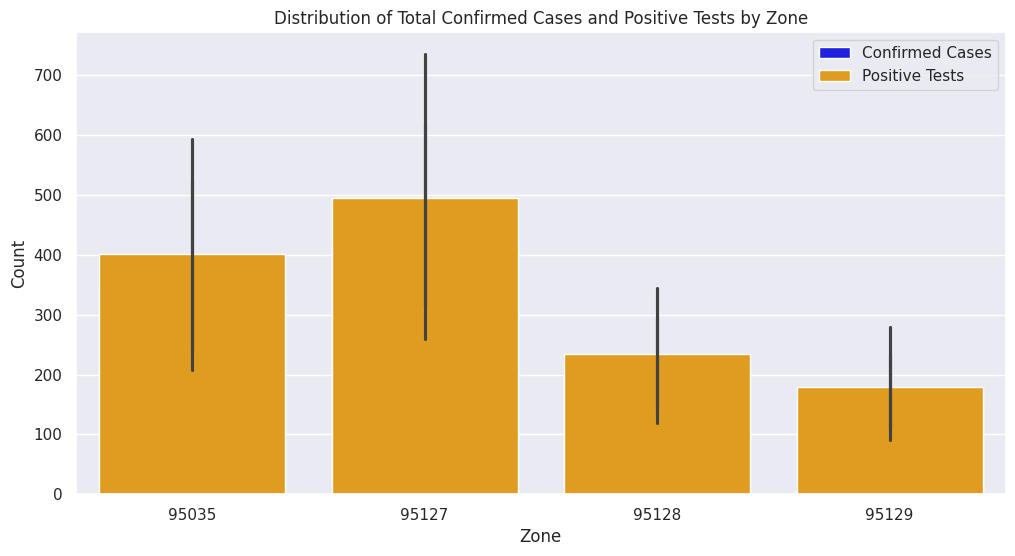

In [478]:
plt.figure(figsize=(12, 6))

sns.barplot(x='zcta', y='case count', data=df, color='blue', label='Confirmed Cases')
sns.barplot(x='zcta', y='positive tests', data=df, color='orange', label='Positive Tests')

plt.xlabel('Zone')
plt.ylabel('Count')
plt.title('Distribution of Total Confirmed Cases and Positive Tests by Zone')
plt.legend()
plt.show()


evolution of the number of positive cases and tests with time ( week , month , year ) for a specific zone


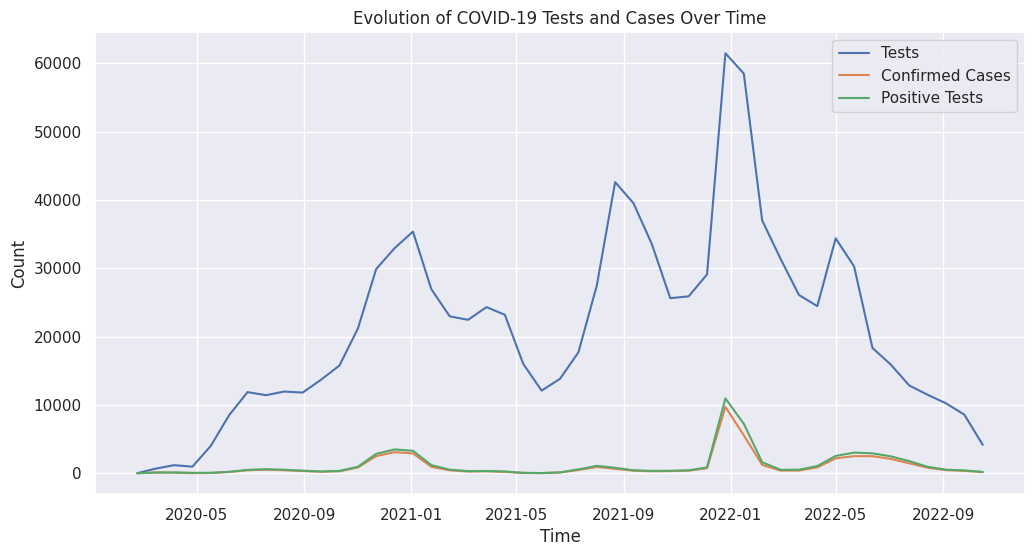

In [479]:
# Group by 'Start date' and sum the values
df_time = df.groupby('Start date')[['test count', 'case count', 'positive tests']].sum()

plt.figure(figsize=(12, 6))

plt.plot(df_time.index, df_time['test count'], label='Tests')
plt.plot(df_time.index, df_time['case count'], label='Confirmed Cases')
plt.plot(df_time.index, df_time['positive tests'], label='Positive Tests')

plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Evolution of COVID-19 Tests and Cases Over Time')
plt.legend()
plt.show()



distribution of positive cases per zone and per year


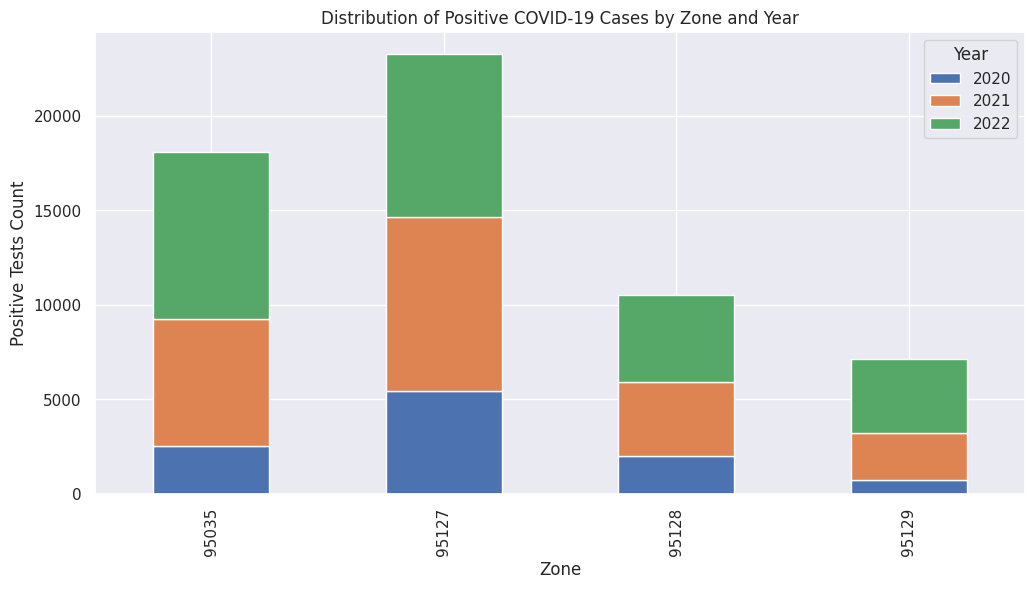

In [480]:
df['Year'] = df['Start date'].dt.year

# Group by 'zcta' and 'Year' and sum the values
df_zone_year = df.groupby(['zcta', 'Year'])['positive tests'].sum().unstack()

df_zone_year.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Zone')
plt.ylabel('Positive Tests Count')
plt.title('Distribution of Positive COVID-19 Cases by Zone and Year')
plt.legend(title='Year')
plt.show()


le rapport entre la population et le nombre de tests


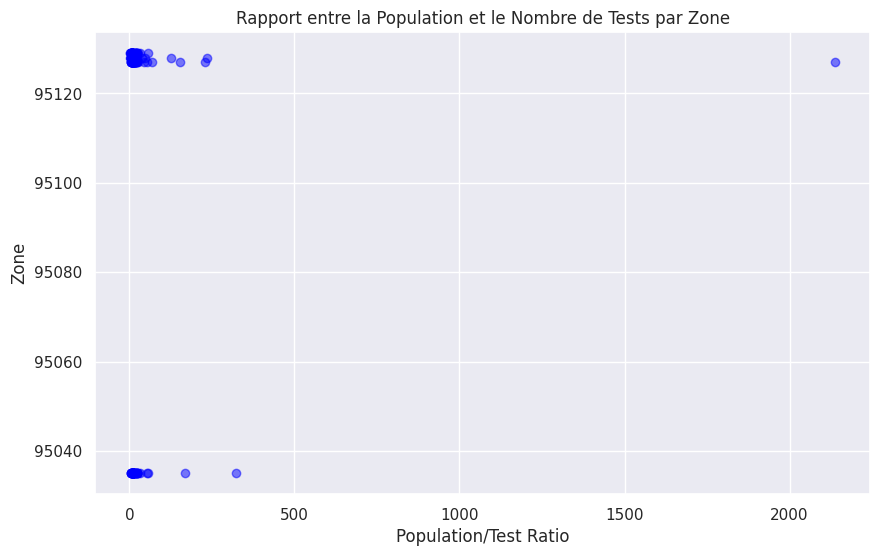

{'zcta': {'min': 95035,
  'max': 95129,
  'mean': 95104.3163841808,
  'median': 95127,
  'mode': 95127,
  'std': 40.47809496797724},
 'time_period': {'min': 21,
  'max': 155,
  'mean': 45.66101694915254,
  'median': 45,
  'mode': 32,
  'std': 15.445486609133846},
 'population': {'min': 36975,
  'max': 79655,
  'mean': 56226.11299435028,
  'median': 66256,
  'mode': 66256,
  'std': 17941.651850294485},
 'Start date': {'min': Timestamp('2020-02-23 00:00:00'),
  'max': Timestamp('2022-10-16 00:00:00'),
  'mean': Timestamp('2021-07-13 00:24:24.406779648'),
  'median': Timestamp('2021-07-11 00:00:00'),
  'mode': Timestamp('2020-10-11 00:00:00'),
  'std': Timestamp('1970-10-02 18:23:45.176928036')},
 'end date': {'min': Timestamp('2020-03-14 00:00:00'),
  'max': Timestamp('2022-11-05 00:00:00'),
  'mean': Timestamp('2021-08-02 00:24:24.406779648'),
  'median': Timestamp('2021-07-31 00:00:00'),
  'mode': Timestamp('2020-10-31 00:00:00'),
  'std': Timestamp('1970-10-02 18:23:45.176928036')},
 

In [481]:
df['Population/Test Ratio'] = df['population'] / df['test count']

plt.figure(figsize=(10, 6))
plt.scatter(df['Population/Test Ratio'], df['zcta'], color='blue', alpha=0.5)
plt.xlabel('Population/Test Ratio')
plt.ylabel('Zone')
plt.title('Rapport entre la Population et le Nombre de Tests par Zone')
plt.show()
a

5 zones les plus touchées


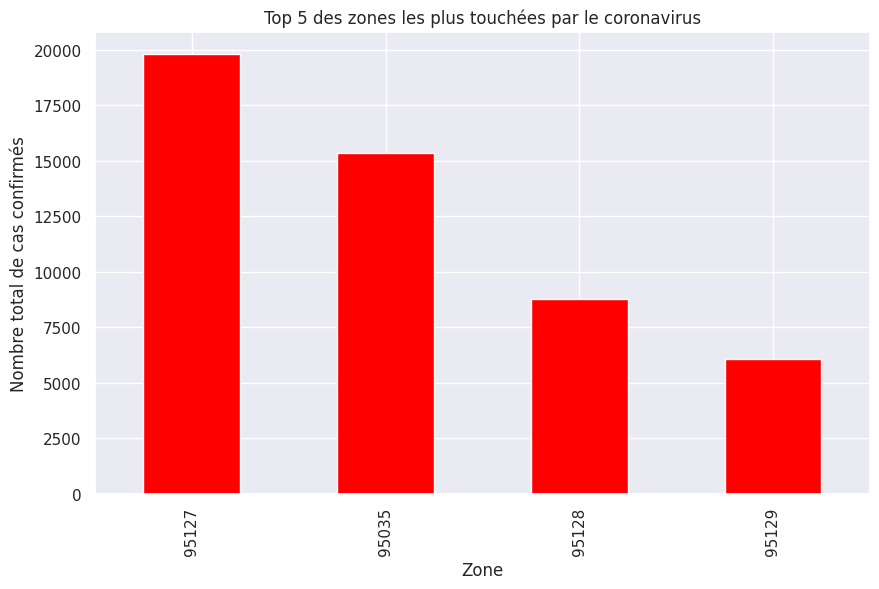

In [482]:
# Trier le DataFrame par le nombre total de cas confirmés
top_zones_cases = df.groupby('zcta')['case count'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
top_zones_cases.plot(kind='bar', color='red')
plt.xlabel('Zone')
plt.ylabel('Nombre total de cas confirmés')
plt.title('Top 5 des zones les plus touchées par le coronavirus')
plt.show()
